* reference  
https://github.com/eriklindernoren/ML-From-Scratch  
https://beckernick.github.io/logistic-regression-from-scratch/

In [163]:
from __future__ import division
import numpy as np
import math
from sklearn.metrics import accuracy_score
from sklearn import datasets
X, y = datasets.load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

In [7]:
def make_diagonal(x):
    """ Converts a vector into an diagonal matrix """
    m = np.zeros((len(x), len(x)))
    for i in range(len(m[0])):
        m[i, i] = x[i]
    return m

In [8]:
make_diagonal([22,3,5,7,66])

array([[22.,  0.,  0.,  0.,  0.],
       [ 0.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  0.],
       [ 0.,  0.,  0.,  0., 66.]])

___

#### Sigmoid function
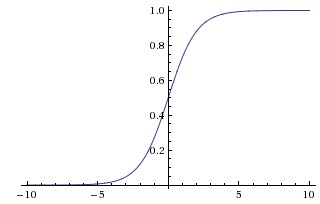      


___
### sigmoid  
$Sigmoid(x) = \large \frac{1}{1+e^{-x}}$

### derivative of sigmoid  
$\frac{d}{dx}S(x) = S(x)(1 - S(x))$

In [12]:
class Sigmoid():
    def __call__(self, x):
        return 1 / (1 + np.exp(-x))

    def gradient(self, x):
        return self.__call__(x) * (1 - self.__call__(x))


In [22]:
Sigmoid()(0), Sigmoid()(1), Sigmoid()(10), Sigmoid()(-5), Sigmoid()(-1)

(0.5,
 0.7310585786300049,
 0.9999546021312976,
 0.0066928509242848554,
 0.2689414213699951)

### The major diff from linear regression is 
* ###  logistic regression wrap each h(Xi) in Sigmoid function

#### update theta  
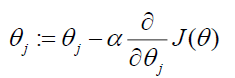     

### derivative of loss function (gradient)  
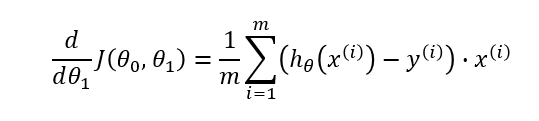      


### Normal Equation
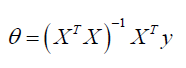      


* np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    * y= diag_gradient.dot(X).dot(self.param) + y - y_pred

In [242]:
class LogisticRegression():
    """ Logistic Regression classifier.
    Parameters:
    -----------
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    gradient_descent: boolean
        True or false depending if gradient descent should be used when training. If
        false then we use batch optimization by least squares.
    """
    def __init__(self, learning_rate=.1, gradient_descent=True):
        
        self.param = None
        self.learning_rate = learning_rate
        self.gradient_descent = gradient_descent
        self.sigmoid = Sigmoid()

    def _initialize_parameters(self, X):
        
        n_features = np.shape(X)[1]
        # Initialize parameters between [-1/sqrt(N), 1/sqrt(N)]
        limit = 1 / math.sqrt(n_features)
        self.param = np.random.uniform(-limit, limit, (n_features,))

    def fit(self, X, y, n_iterations=4000):
        
        self._initialize_parameters(X)
        # Tune parameters for n iterations
        
        for i in range(n_iterations):
            
            # for each loop
            # Make a new prediction
            y_pred = self.sigmoid(X.dot(self.param))
            
            if self.gradient_descent:
                # Move against the gradient of the loss function with
                # respect to the parameters to minimize the loss
                # derivative of loss function
                self.param -= self.learning_rate * -(y - y_pred).dot(X)
                
            else:
                # batch optimization by least squares
                # in each loop
                # Make a diagonal matrix of the sigmoid gradient column vector
                diag_gradient = make_diagonal(self.sigmoid.gradient(X.dot(self.param)))
                # Batch opt:
                # update weights
                self.param = np.linalg.pinv(X.T.dot(diag_gradient).dot(X)).dot(X.T).dot(diag_gradient.dot(X).dot(self.param) + y - y_pred)

    def predict(self, X):
        y_pred = np.round(self.sigmoid(X.dot(self.param))).astype(int)
        return y_pred

In [246]:
lr = LogisticRegression(gradient_descent=True, learning_rate=1e-7)
lr

<__main__.LogisticRegression instance at 0x7fccff55a8c0>

In [247]:
lr.fit(X,y, n_iterations=7000)

In [248]:
accuracy_score(y, lr.predict(X))

0.929701230228471

___

In [249]:
lr2 = LogisticRegression(gradient_descent=False)
lr2

<__main__.LogisticRegression instance at 0x7fccff5753f8>

In [251]:
%%time
lr2.fit(X,y)
print accuracy_score(y, lr2.predict(X))

/home/saya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0.9789103690685413
CPU times: user 39 s, sys: 43.7 s, total: 1min 22s
Wall time: 28.9 s


___

In [48]:
from sklearn.linear_model import LogisticRegression

In [50]:
llr = LogisticRegression()
llr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
llr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
accuracy_score(y, llr.predict(X))

0.9595782073813708

In [54]:
np.linalg.solve?

In [56]:
LogisticRegression??

___

### Log likelihood
## $\begin{equation} ll = \sum_{i=1}^{N}y_{i}\beta ^{T}x_{i} - log(1+e^{\beta^{T}x_{i}}) \end{equation}$

In [69]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [70]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in xrange(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print log_likelihood(features, target, weights)
        
    return weights

___

In [190]:
X.shape, y.shape, y.reshape(-1,1).shape, y.reshape(1,-1).shape

((569, 30), (569,), (569, 1), (1, 569))

In [194]:
X.T.shape

(30, 569)

In [192]:
np.array([1,2,3]).shape

(3,)

In [198]:
w = np.linalg.lstsq(X, y, rcond=-1)[0]

In [199]:
w

array([ 4.20048238e-01, -2.62153812e-03, -2.39140928e-02, -1.85607593e-03,
       -3.50641263e-01,  1.22436738e-01, -8.50448171e-01, -3.46627071e+00,
        7.00710101e-01,  2.78415772e+01, -3.76296067e-01, -2.11018810e-03,
        7.14847109e-03,  2.13960183e-03, -1.38783330e+01,  2.77953618e+00,
        3.48764215e+00, -1.08563318e+01, -1.30046054e+00, -1.53194185e+01,
       -2.52665298e-01, -5.85892581e-03,  6.89389150e-03,  1.18172626e-03,
        3.72669307e-01,  1.49020705e-01, -4.66897919e-01, -5.76613586e-01,
       -6.78151632e-01, -5.85613887e+00])

In [208]:
make_diagonal(y).shape

(569, 569)

### below two methods result very similar

In [218]:
w1 = np.linalg.lstsq(X, y, rcond=-1)[0]
w2 = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

In [224]:
w2[0]

0.42004823805158714

In [225]:
w1[0]

0.420048238137919

In [221]:
np.array_equal(w1,w2)

False